실행하기전 꼭 런타임을 gpu로 바꿀것.

In [23]:
!pip install kaggle

https://kaggle-kr.tistory.com/21 에 접속 하여  colab과 kaggle연동하기

In [24]:
from google.colab import files
files.upload()

{}

In [25]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 500 ~/.kaggle/kaggle.json
!ls ~/.kaggle/

kaggle.json


In [26]:
!kaggle --version

Kaggle API 1.5.4


In [27]:
!kaggle competitions download -c dogs-vs-cats -p ./datasets/cats_and_dogs/

sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
test1.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)


In [28]:
!unzip ./datasets/cats_and_dogs/train.zip -d ./datasets/cats_and_dogs/
!unzip ./datasets/cats_and_dogs/test1.zip -d ./datasets/cats_and_dogs/


Archive:  ./datasets/cats_and_dogs/train.zip
replace ./datasets/cats_and_dogs/train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  ./datasets/cats_and_dogs/test1.zip
replace ./datasets/cats_and_dogs/test1/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [29]:
!ls ./datasets/cats_and_dogs

sampleSubmission.csv  test1  test1.zip	train  train.zip


In [0]:
import os, shutil

In [0]:
# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = './datasets/cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = './datasets/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [32]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))


훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


make network

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layer=layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)   ))
model.add(layer=layers.MaxPooling2D((2,2)) )
model.add(layer=layers.Conv2D(64, (3,3), activation='relu' ))
model.add(layer=layers.MaxPooling2D((2,2)) )
model.add(layer=layers.Conv2D(128, (3,3), activation='relu' ))
model.add(layer=layers.MaxPooling2D((2,2)) )
model.add(layer=layers.Conv2D(128, (3,3), activation='relu' ))
model.add(layer=layers.MaxPooling2D((2,2)) )
model.add(layer=layers.Flatten() )
model.add(layer=layers.Dense(512, activation='relu') )
model.add(layer=layers.Dense(1, activation='sigmoid' ))

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [0]:
from keras import *
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy]
             )

read image using ImageDataGenerator in dir

In [56]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


check 

In [57]:
for data_batch, labels_batch in train_generator:
    print('batch data size:', data_batch.shape)
    print('batch label size:', labels_batch.shape)
    break

batch data size: (20, 150, 150, 3)
batch label size: (20,)


training model using batch generator

In [58]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 11s 110ms/step - loss: 0.6876 - binary_accuracy: 0.5335 - val_loss: 0.6736 - val_binary_accuracy: 0.5760
Epoch 2/30
100/100 [==============================] - 10s 103ms/step - loss: 0.6446 - binary_accuracy: 0.6215 - val_loss: 0.6433 - val_binary_accuracy: 0.5960
Epoch 3/30
100/100 [==============================] - 10s 104ms/step - loss: 0.5901 - binary_accuracy: 0.6890 - val_loss: 0.6074 - val_binary_accuracy: 0.6670
Epoch 4/30
100/100 [==============================] - 10s 104ms/step - loss: 0.5618 - binary_accuracy: 0.7100 - val_loss: 0.6478 - val_binary_accuracy: 0.6260
Epoch 5/30
100/100 [==============================] - 10s 104ms/step - loss: 0.5303 - binary_accuracy: 0.7415 - val_loss: 0.6004 - val_binary_accuracy: 0.6690
Epoch 6/30
100/100 [==============================] - 10s 104ms/step - loss: 0.5065 - binary_accuracy: 0.7550 - val_loss: 0.6086 - val_binary_accuracy: 0.6810
Epoch 7/30
100/100 [==========================

save model

In [0]:
model.save('cats_and_dogs_small_1.h5')

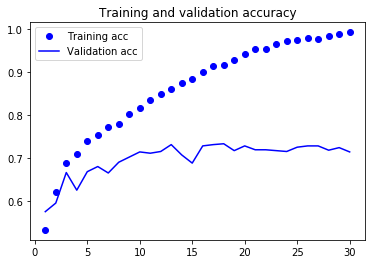

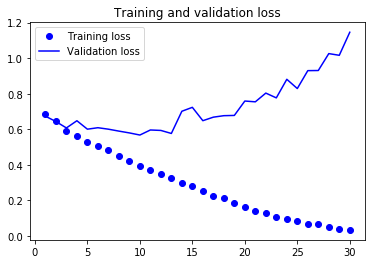

In [60]:
import matplotlib.pyplot as plt

history.history

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1 )

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



Data augmentation ( for avoid overfitting..  we have a few number of images... )

In [0]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [43]:
Draw image used Data augmentation.

SyntaxError: ignored

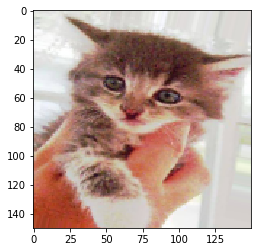

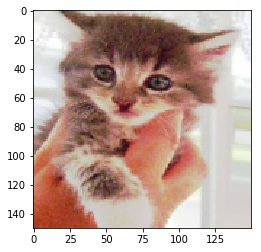

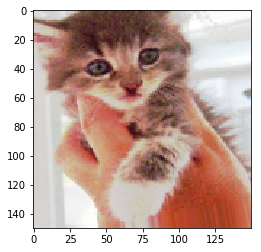

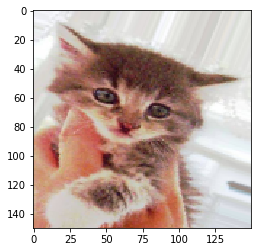

In [44]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3] # select one image applied Augmentation

img = image.load_img(img_path, target_size=(150,150)  )

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

make model include dropout (because there is not enoght data to avoid overfit. so we need another method)

In [45]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layer=layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)   ))
model.add(layer=layers.MaxPooling2D((2,2)) )
model.add(layer=layers.Conv2D(64, (3,3), activation='relu' ))
model.add(layer=layers.MaxPooling2D((2,2)) )
model.add(layer=layers.Conv2D(128, (3,3), activation='relu' ))
model.add(layer=layers.MaxPooling2D((2,2)) )
model.add(layer=layers.Conv2D(128, (3,3), activation='relu' ))
model.add(layer=layers.MaxPooling2D((2,2)) )
model.add(layer=layers.Flatten() )
model.add(layer=layers.Dropout(0.5) )
model.add(layer=layers.Dense(512, activation='relu') )
model.add(layer=layers.Dense(1, activation='sigmoid' ))

model.compile(loss=losses.binary_crossentropy,
          optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=[metrics.binary_accuracy]
             )


W0624 10:42:04.939427 140567200589696 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Let's prepare to data again ( Do apply Augmentation )

In [46]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
#     fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

model.save('cats_and_dogs_small_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 35s 352ms/step - loss: 0.6947 - binary_accuracy: 0.5187 - val_loss: 0.6829 - val_binary_accuracy: 0.5901
Epoch 2/30
100/100 [==============================] - 31s 310ms/step - loss: 0.6858 - binary_accuracy: 0.5603 - val_loss: 0.7083 - val_binary_accuracy: 0.5045
Epoch 3/30
100/100 [==============================] - 31s 311ms/step - loss: 0.6736 - binary_accuracy: 0.5866 - val_loss: 0.6999 - val_binary_accuracy: 0.5431
Epoch 4/30
100/100 [==============================] - 31s 310ms/step - loss: 0.6670 - binary_accuracy: 0.5922 - val_loss: 0.6462 - val_binary_accuracy: 0.6314
Epoch 5/30
100/100 [==============================] - 31s 310ms/step - loss: 0.6453 - binary_accuracy: 0.6181 - val_loss: 0.6215 - val_binary_accuracy: 0.6428
Epoch 6/30
100/100 [==============================] - 31s 308ms/step - loss: 0.6342 - binary_accuracy: 0.6334 - val_loss:

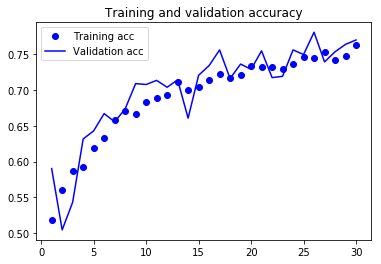

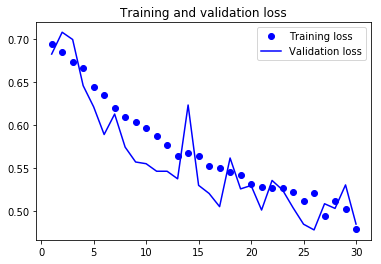

In [47]:
import matplotlib.pyplot as plt

history.history

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1 )

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()